## Simple Neural Network with Numpy

Objectives:

*   Coding a simple neural network for classification using numpy
*   Implementing forward propagation, backward propagation, gradient descent
*   Visualizing predicted decision boundaries for toy datasets

In [44]:
%reset

In [45]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
# Random seed for reproducability
random_seed = 123
np.random.seed(random_seed)

# Total number of data points
n_samples = 1500

# Toy datasets
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.2)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.2)

In [47]:
noisy_circles

(array([[ 0.90281616, -0.37733009],
        [ 0.62581645, -0.31946177],
        [-0.07162694, -0.68673551],
        ...,
        [ 0.22979264, -0.34601799],
        [ 0.64769555, -0.41775144],
        [ 0.22053935, -0.4953175 ]]),
 array([0, 1, 0, ..., 1, 1, 1], dtype=int64))

In [48]:
# Function for splitting into train and test sets
def split(dataset):

    # Get data and labels
    X,Y = dataset

    # Reshape Y to [num_points, 1]
    Y = np.expand_dims(Y, axis=1) #y - это классы

    # Split the data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

    print('X_train: {}, X_test: {}, Y_train: {}, Y_test: {}'.format(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape))
    return X_train, X_test, Y_train, Y_test

In [49]:
# Function for plotting the decision boundary of scikit classifiers
def plot_decision_boundary(clf, X, Y, params=None, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

In [50]:
# Calculates the accuracy of the predictions against the true labels
def calc_accuracy(clf, X, Y):
    predictions = clf.predict(X)
    Y = Y.reshape(predictions.shape)
    accuracy = float((np.dot(Y,predictions) + np.dot(1-Y,1-predictions))/float(Y.size)*100)
    return accuracy

In [51]:
# First, we are working with the noisy moons dataset
X_train, X_test, Y_train, Y_test = split(noisy_moons)

X_train: (1125, 2), X_test: (375, 2), Y_train: (1125, 1), Y_test: (375, 1)


Text(0.5, 1.0, 'Noisy Moons training data')

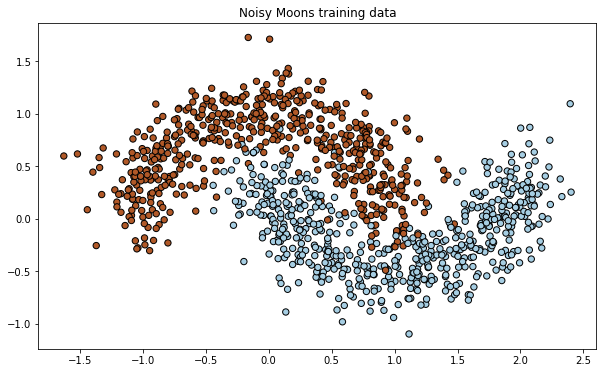

In [52]:
# Visualize the data:
plt.figure(figsize=(10,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train[:,0], s=40, cmap='Paired_r', edgecolors='k');
plt.title('Noisy Moons training data')

Text(0.5, 1.0, 'Noisy Moons test data')

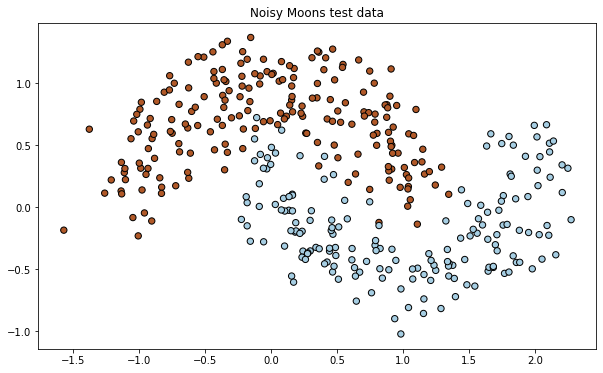

In [53]:
# Visualize the data:
plt.figure(figsize=(10,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test[:,0], s=40, cmap='Paired_r', edgecolors='k');
plt.title('Noisy Moons test data')

Training accuracy:85.42222222222222
Test accuracy:88.53333333333333


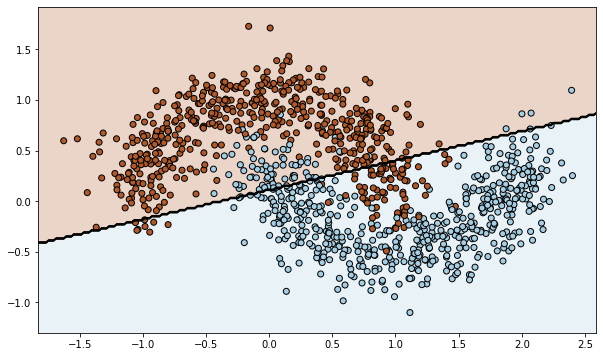

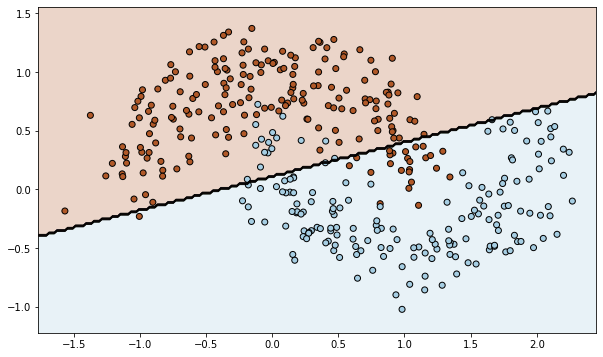

In [54]:
# Logistic Regression classifier
logistic_classifier = sklearn.linear_model.LogisticRegressionCV(cv=3);
logistic_classifier.fit(X_train, Y_train[:,0]);

# Decision boundary
plot_decision_boundary(logistic_classifier, X_train, Y_train[:,0])
plot_decision_boundary(logistic_classifier, X_test, Y_test[:,0])
#plt.title("Logistic Regression")

# Print accuracy
logistic_moon_train_accuracy = calc_accuracy(logistic_classifier, X_train, Y_train)
logistic_moon_test_accuracy = calc_accuracy(logistic_classifier, X_test, Y_test)

print('Training accuracy:' + str(logistic_moon_train_accuracy))
print('Test accuracy:' + str(logistic_moon_test_accuracy))

**Simple Neural Network**


<p><img src="images/numpy_network.svg" width=600 align="center"></p>

In [55]:
# Function for computing the sigmoid activation function
def sigmoid(input):
    return np.exp(input)/(np.exp(input) +  1.0)  # Think? Why do we use np.exp instead of math.exp?

In [56]:
# Function for initializing the parameters (weights and biases) of our neural network
# We are working with a network which has 1 hidden layer and 1 output layer
def init_model(X, Y, n_hidden):
    '''
    Arguments: 
              X: data
              Y: labels
              n_hidden: Number of hidden units

    Returns:
              params:  python dictionary containing your parameters:
                       W1 - weight matrix of shape (n_hidden, n_input)
                       b1 - bias vector of shape (n_hidden, 1)
                       W2 - weight matrix of shape (n_output, n_hidden)
                       b2 - bias vector of shape (n_hidden, 1)
    '''
    '''
    A bias vector is an additional set of weights in a neural network that 
    require no input, and this it corresponds to the output of an artificial 
    neural network when it has zero input. Bias represents an extra neuron 
    included with each pre-output layer and stores the value of “1,” for each action.
    '''
    # Calculate the number of nodes in the input and output layers
    n_input = X.shape[1] # количество столбцов
    n_output = Y.shape[1]

    # Initialize the weights and biases
    W1 = np.random.randn(n_hidden, n_input) * 0.01 #n_hidden rows, n_input columns 3 x 2
    b1 = np.zeros((1, n_hidden)) # 1 row, n_hidden columns
    W2 = np.random.randn(n_output, n_hidden) * 0.01 # 1 x 3
    b2 = np.zeros((1, n_output))
    
    assert (W1.shape == (n_hidden, n_input))
    assert (b1.shape == (1, n_hidden))
    assert (W2.shape == (n_output, n_hidden))
    assert (b2.shape == (1, n_output))
    
    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2}
    
    return parameters

**Steps for Forward Propagation**

1. $Z^{[1]} = XW^{[1]T} + b^{[1]}$ - unit of a hidden layer
2. $A^{[1]} = g^{[1]}(Z^{[1]})$ (where $g^{[1]}$ is the activation function of layer 1) - activation of входящего a unit
3. $Z^{[2]} = A^{[1]}W^{[2]T} + b^{[2]}$ - output unit
4. $A^{[2]} = g^{[2]}(Z^{[1]})$ (where $g^{[2]}$ is the sigmoid function)

In [57]:
# Forward-propagates the data through the neural network
def forward_propagation(X, parameters):
    '''
    Arguments:
            X: input data of size (num_points, n_input)
            parameters: python dict of params
    
    returns:
            A2: The sigmoid output of the second activation
            cache: a dictionary containing 'Z1', 'A1', 'Z2' and 'A2'
    '''
    # Retrieve weights and biases
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(X,W1.T) + b1 
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2.T) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (X.shape[0], 1)) # == (количеству строчек X, 1 столбец)
    
    cache = {'Z1': Z1, 
             'A1': A1, 
             'Z2': Z2,
             'A2': A2}
    
    return A2, cache  # Think: Why do we return the cache?

In [58]:
# Check the shape of our data
print('Shape of X_train: {} and Y_train: {}'.format(X_train.shape, Y_train.shape))

Shape of X_train: (1125, 2) and Y_train: (1125, 1)


In [59]:
# Initialize the weights and biases
params = init_model(X_train, Y_train, n_hidden=5)

# Let's verify that our weights and biases have the desired shapes
for k,v in params.items():
    print('Shape of {}: {}'.format(k,v.shape))

Shape of W1: (5, 2)
Shape of b1: (1, 5)
Shape of W2: (1, 5)
Shape of b2: (1, 1)


In [60]:
# Test the forward propagation function
A2, cache = forward_propagation(X_train, params)

In [61]:
# Let's verify that elements in the cache have the desired shapes
for k,v in cache.items():
    print('Shape of {}: {}'.format(k,v.shape))

Shape of Z1: (1125, 5)
Shape of A1: (1125, 5)
Shape of Z2: (1125, 1)
Shape of A2: (1125, 1)


**Definition of cross entropy loss**

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small$$

In [62]:
# Computes the cross-entropy loss for binary classification
def loss(A2, Y, params):
    '''
    Computes the cross-entropy loss
    
    Arguments:
        A2: The sigmoid output of the second activation
        Y: "true" labels vector of shape
        params: python dictionary containing parameters W1, b1, W2 and b2
    
    Returns:
        cost: cross-entropy loss
    '''
    
    # Number of data points
    num_data_points = Y.shape[0]

    # Compute the cross-entropy loss
    logprobs = np.multiply(Y, np.log(A2)) + np.multiply(1.0 - Y, np.log(1.0 - A2))
    loss = -np.sum(logprobs)/num_data_points
    
    # Convert loss to a scalar float
    cost = np.squeeze(loss) 

    assert(isinstance(loss, float))
    
    return loss

In [63]:
print('Loss = {}'.format(loss(A2, Y_train, params)))

Loss = 0.6932037781741328


**Steps for Backward Propagation**
($\text{d}Z^{[2]}$ stands for $\cfrac{\partial{J}}{\partial{Z^{[2]}}}$ and so on)
1. $\text{d}Z^{[2]} = A^{[2]} - Y$ (assuming sigmoid function is used in the output layer)
2. $\text{d}W^{[2]} = \cfrac{1}{m} \text{d}Z^{[2]T} A^{[1]}$
3. $\text{d}b^{[2]} = \cfrac{1}{m}$np.sum($\text{d}Z^{[2]}$, axis=0, keepdims=True)
4. $\text{d}Z^{[1]} = (\text{d}Z^{[2]}W^{[2]})  \odot (g'^{[1]}(Z^{[1]}))$
5. $\text{d}W^{[1]} = \cfrac{1}{m} \text{d}Z^{[1]T}X$
6. $\text{d}b^{[1]} = \cfrac{1}{m}$np.sum($\text{d}Z^{[1]}$, axis=0, keepdims=True)

In [64]:
# Backprop function
def backward_propagation(parameters, cache, X, Y):
    '''
    Arguments:
        parameters: python dictionary containing parameters (weights and biases)
        cache: a dictionary containing 'Z1', 'A1', 'Z2' and 'A2'
        X: input data of shape (number of examples, 2)
        Y: true labels vector of shape (number of examples, 1)
    
    Returns:
        grads: dictionary containing gradients w.r.t. different parameters
    '''
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary 'parameters'
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary 'cache'
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2.T, A1)/m
    db2 = np.sum(dZ2, axis=0, keepdims=True)/m
    dZ1 = np.multiply(np.dot(dZ2, W2), (1 - np.power(A1, 2)))
    dW1 = np.dot(dZ1.T, X)/m
    db1 = np.sum(dZ1, axis=0, keepdims=True)/m
    
    grads = {'dW1': dW1,
             'db1': db1,
             'dW2': dW2,
             'db2': db2}
    
    return grads

In [65]:
grads = backward_propagation(params, cache, X_train, Y_train)

In [66]:
# Let's verify that elements in grads have the desired shapes
for k,v in grads.items():
    print('Shape of {}: {}'.format(k,v.shape))

Shape of dW1: (5, 2)
Shape of db1: (1, 5)
Shape of dW2: (1, 5)
Shape of db2: (1, 1)


**Parameter update rule**
$$ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

In [67]:
# Use the gradients to update the parameters
def update_parameters(parameters, grads, learning_rate = 0.01):
    '''
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    '''
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2}
    
    return parameters

In [68]:
params = update_parameters(params, grads)

In [69]:
def train_neural_network(X, Y, n_hidden, learning_rate=0.01, num_iterations = 10000, print_cost=False):
    '''
    Arguments:
        X: dataset of shape (number of examples, 2)
        Y: labels of shape (number of examples, 1)
        n_hidden: size of the hidden layer
        num_iterations: Number of iterations in gradient descent loop
        learning_rate: Learning rate for gradient descent
        print_cost: if True, print the cost every 1000 iterations
    
    Returns:
        parameters: parameters learnt by the model which can be used to predict
    '''
    
    np.random.seed(3)
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = init_model(X, Y, n_hidden)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
         
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)
        
        # Loss function. Inputs: "A2, Y, parameters". Outputs: "loss".
        loss_value = loss(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss_value every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Loss after iteration %i: %f" %(i, loss_value))

    return parameters

In [70]:
# Lets train our network for the moon dataset
params_moon_3 = train_neural_network(X_train, Y_train, 3, learning_rate=0.01, num_iterations=10000, print_cost=True)

Loss after iteration 0: 0.693174
Loss after iteration 1000: 0.088327
Loss after iteration 2000: 0.088247
Loss after iteration 3000: 0.088970
Loss after iteration 4000: 0.083245
Loss after iteration 5000: 0.082885
Loss after iteration 6000: 0.083235
Loss after iteration 7000: 0.082758
Loss after iteration 8000: 0.082805
Loss after iteration 9000: 0.083202


In [71]:
params_moon_50 = train_neural_network(X_train, Y_train, 50, learning_rate=0.01, num_iterations=10000, print_cost=True)

Loss after iteration 0: 0.692910


<ipython-input-62-615d2b847f56>:19: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(Y, np.log(A2)) + np.multiply(1.0 - Y, np.log(1.0 - A2))
<ipython-input-62-615d2b847f56>:19: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(Y, np.log(A2)) + np.multiply(1.0 - Y, np.log(1.0 - A2))


Loss after iteration 1000: 0.082837
Loss after iteration 2000: 0.074800
Loss after iteration 3000: 0.075619
Loss after iteration 4000: 0.074130
Loss after iteration 5000: 0.072341
Loss after iteration 6000: 0.071106
Loss after iteration 7000: 0.070198
Loss after iteration 8000: 0.069356
Loss after iteration 9000: 0.068525


In [72]:
# Make predictions (class 0 or 1) using the learned parameters
def predict(parameters, X):
    '''   
    Arguments:
        parameters: dictionary containing parameters (weights and biases)
        X: input data for which label is to be predicted
        
    Returns:
        predictions: vector of predictions of our model (class 0 or 1)
    '''
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    
    return predictions

In [73]:
# Plots the decision boundary predicted by the neural network
def plot_decision_boundary_nn(predict_fn, params, X, Y_true, cmap='Paired_r'):
    
    # Predictions for the input X values
    Y = predict_fn(params, X)

    # For constructing the grid limits
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Make predictions for each value inside the grid and reshape
    Z = predict_fn(params, np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', alpha=1.0)
    plt.scatter(X[:,0], X[:,1], c=Y_true[:,0], cmap=cmap, edgecolors='k');

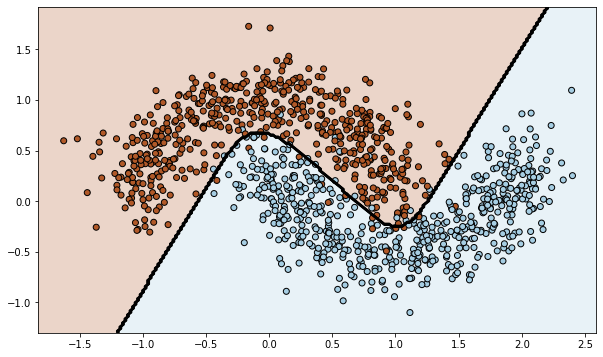

In [74]:
# Plot the decision boundary for the training data
plot_decision_boundary_nn(predict, params_moon_3, X_train, Y_train)

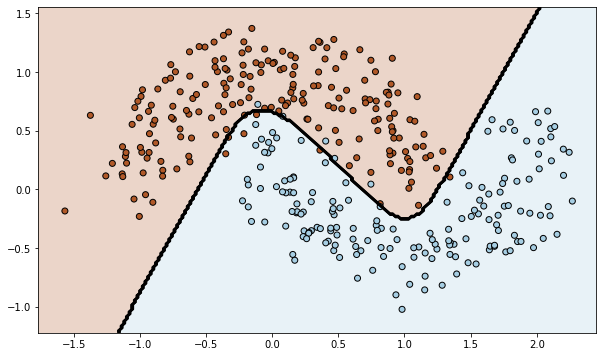

In [75]:
# Plot the decision boundary for the test data
plot_decision_boundary_nn(predict, params_moon_3, X_test, Y_test)

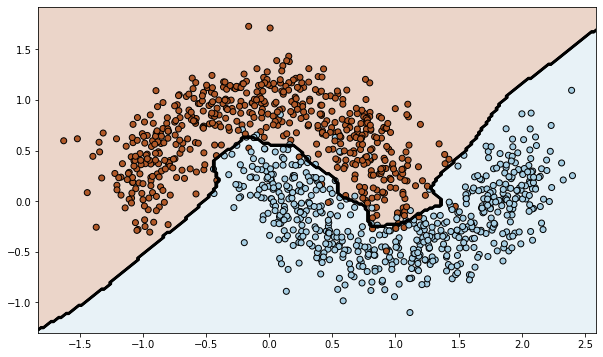

In [76]:
# Plot the decision boundary for the training data
plot_decision_boundary_nn(predict, params_moon_50, X_train, Y_train)

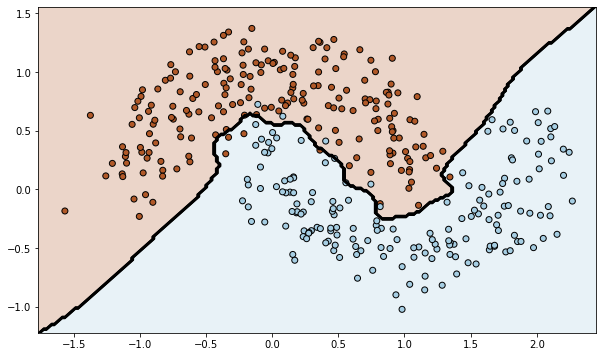

In [77]:
# Plot the decision boundary for the test data
plot_decision_boundary_nn(predict, params_moon_50, X_test, Y_test)

In [78]:
# Circles dataset
X_train_circle, X_test_circle, Y_train_circle, Y_test_circle = split(noisy_circles)

X_train: (1125, 2), X_test: (375, 2), Y_train: (1125, 1), Y_test: (375, 1)


In [79]:
# Lets train our network for the circles dataset
params_circles_3 = train_neural_network(X_train_circle, Y_train_circle, 3, learning_rate=0.01, num_iterations=10000, print_cost=True)

Loss after iteration 0: 0.693147
Loss after iteration 1000: 0.645850
Loss after iteration 2000: 0.364711
Loss after iteration 3000: 0.364709
Loss after iteration 4000: 0.364709
Loss after iteration 5000: 0.364709
Loss after iteration 6000: 0.364709
Loss after iteration 7000: 0.364709
Loss after iteration 8000: 0.364709
Loss after iteration 9000: 0.364709


In [80]:
# Lets train our network for the circles dataset
params_circles_50 = train_neural_network(X_train_circle, Y_train_circle, 50, learning_rate=0.01, num_iterations=10000, print_cost=True)

Loss after iteration 0: 0.693148
Loss after iteration 1000: 0.693095


<ipython-input-62-615d2b847f56>:19: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(Y, np.log(A2)) + np.multiply(1.0 - Y, np.log(1.0 - A2))
<ipython-input-62-615d2b847f56>:19: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(Y, np.log(A2)) + np.multiply(1.0 - Y, np.log(1.0 - A2))


Loss after iteration 2000: 0.285262
Loss after iteration 3000: 0.244585
Loss after iteration 4000: 0.215179
Loss after iteration 5000: 0.222382
Loss after iteration 6000: 0.475366
Loss after iteration 7000: 0.203587
Loss after iteration 8000: 0.227940
Loss after iteration 9000: 0.234054


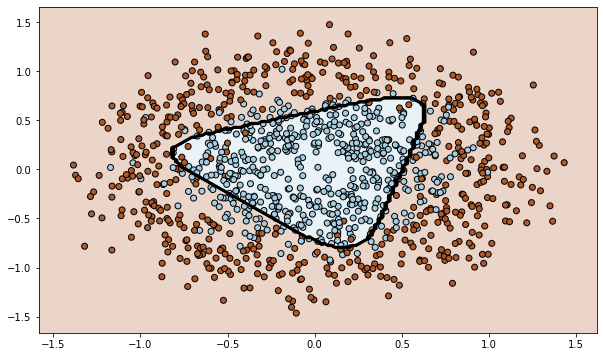

In [81]:
# Plot the decision boundary for the training data
plot_decision_boundary_nn(predict, params_circles_3, X_train_circle, Y_train_circle)

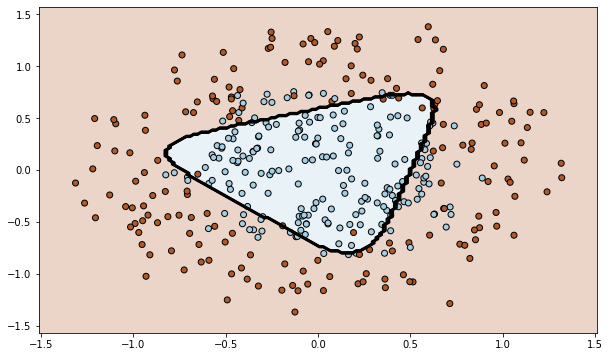

In [82]:
# Plot the decision boundary for the test data
plot_decision_boundary_nn(predict, params_circles_3, X_test_circle, Y_test_circle)

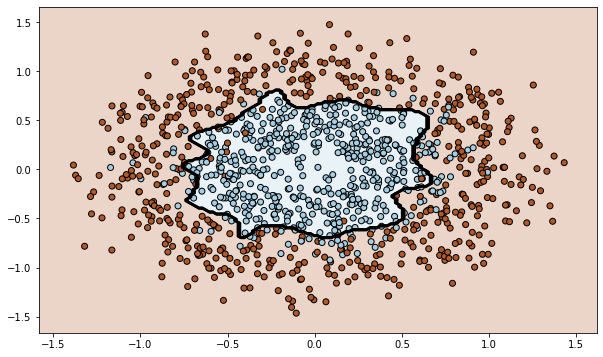

In [83]:
# Plot the decision boundary for the training data
plot_decision_boundary_nn(predict, params_circles_50, X_train_circle, Y_train_circle)

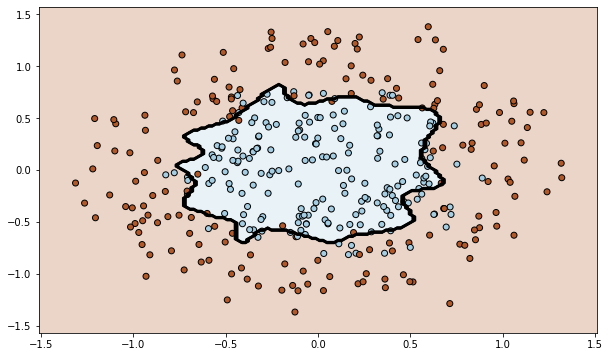

In [84]:
# Plot the decision boundary for the test data
plot_decision_boundary_nn(predict, params_circles_50, X_test_circle, Y_test_circle)